In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [1]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import quandl
import re
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.tools.set_credentials_file(username='', api_key='')

API = ''
quandl.ApiConfig.api_key = API

py.sign_in('', '')

In [2]:
stocks = pd.read_csv("automobiles.csv")
names = pd.read_csv("stocknames.csv")
names = names.set_index('Code')
stock_list = stocks.values[:,0]
print(stock_list)

[500033 500500 500520 532500 500182 500240 500255 500267 505029 505141
 505200 522015 531795 532343 532977]


In [3]:
stock_dict = {}
for coin in stock_list:
    stock_dict[coin] = quandl.get("BSE/BOM"+str(coin), start_date="2017-12-01")
    print(len(stock_dict[coin]),coin)

131 500033
131 500500
131 500520
131 532500
131 500182
131 500240
110 500255
131 500267
131 505029
131 505141
131 505200
6 522015
131 531795
131 532343
131 532977


In [4]:
stock_name_only = stock_list  
print(stock_name_only)

[500033 500500 500520 532500 500182 500240 500255 500267 505029 505141
 505200 522015 531795 532343 532977]


In [5]:
frame = [ stock_dict[name]['Close'] for name in stock_list ]
#for name, item in stock_dict.items():
#    frame.append(item)
df = pd.concat(frame, axis=1, keys=stock_name_only)
df = df.fillna(0)
print(df.head())

             500033  500500   500520   532500   500182  500240  500255  \
Date                                                                     
2017-12-01  3289.75    7.58  1409.25  8607.55  3606.95   78.00    8.78   
2017-12-04  3256.80    7.60  1400.35  8512.90  3605.60   76.55    8.74   
2017-12-05  3200.45    7.79  1389.45  8496.25  3522.15   76.60    8.59   
2017-12-06  3115.45    7.58  1370.35  8600.65  3500.35   75.00    8.37   
2017-12-07  3159.65    7.58  1381.00  8881.10  3555.40   75.15    8.22   

            500267  505029  505141    505200  522015  531795  532343   532977  
Date                                                                           
2017-12-01  137.75  216.50   49.60  29302.50     0.0  423.85  724.45  3212.65  
2017-12-04  137.25  218.60   48.20  29399.10     0.0  427.50  725.45  3199.95  
2017-12-05  136.35  218.75   48.10  28920.05     0.0  423.05  737.30  3160.85  
2017-12-06  137.50  207.85   48.45  28204.75     0.0  420.60  734.10  3108.60  
2

In [6]:
# print(len(df))
df.dropna(inplace=True)
print(len(df))

131


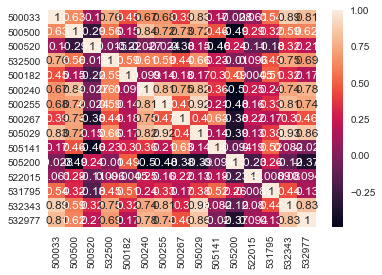

[[ 1.          0.63399319  0.1013831   0.76438865  0.44601441  0.66790241
   0.6830163   0.39003946  0.83242847  0.16752402 -0.02788144  0.06106829
   0.54239291  0.88802179  0.80903926]
 [ 0.63399319  1.         -0.29478362  0.55715235  0.15131764  0.83862592
   0.71864964  0.72996656  0.72083909  0.46138365 -0.48636232  0.28762062
   0.31528263  0.58624607  0.61815586]
 [ 0.1013831  -0.29478362  1.         -0.01455204 -0.22343477 -0.02736273
  -0.02439863 -0.38225979  0.14547658 -0.46261115  0.24054691 -0.11091166
  -0.17711988  0.31581709  0.21145679]
 [ 0.76438865  0.55715235 -0.01455204  1.          0.58598072  0.60815144
   0.59453015  0.44051007  0.65765378  0.23349373 -0.01013255  0.09553142
   0.45361666  0.74834292  0.69078064]
 [ 0.44601441  0.15131764 -0.22343477  0.58598072  1.          0.09860274
   0.14022972  0.18364717  0.17098681  0.30139665  0.49084673 -0.00454852
   0.50542144  0.31633372  0.16765713]
 [ 0.66790241  0.83862592 -0.02736273  0.60815144  0.09860274  1.

In [7]:
sns.set()
sns.heatmap(df.corr(min_periods=12), annot=True)
plt.show()
print(df.corr(min_periods=12).values)
l = []
for k in df.columns:
    p = names.loc["BSE/BOM"+str(k)]
    print(p[0])
    l.append(p[0])
print(l)
trace = go.Heatmap(z = df.corr(min_periods = 12).values.tolist(), colorscale = 'Viridis', x = l, y = l)
data=[trace]
py.iplot(data, filename='correlation-matrix')

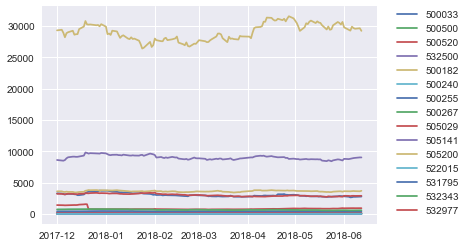

['Force Motors Ltd.-$ EOD Prices', 'Hindustan Motors Ltd. EOD Prices', 'Mahindra & Mahindra Ltd. EOD Prices', 'Maruti Suzuki India Ltd. EOD Prices', 'Hero Motocorp Ltd. EOD Prices', 'Kinetic Engineering Ltd. EOD Prices', 'Lml Ltd. EOD Prices', 'Majestic Auto Ltd.-$ EOD Prices', 'Atlas Cycles (haryana) Ltd. EOD Prices', 'Scooters India Ltd. EOD Prices', 'Eicher Motors Ltd. EOD Prices', 'Vccl Ltd. EOD Prices', 'Atul Auto Ltd.-$ EOD Prices', 'Tvs Motor Company Ltd. EOD Prices', 'Bajaj Auto Ltd. EOD Prices']


In [8]:
for col in df.columns:
    plt.plot(df[col].index, df[col], label=col)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
plt.gcf().clear()
data = []
i = 0
print(l)
for col in df.columns:
    data.append(go.Scatter(x=df[col].index, y=df[col], name = l[i]))
    i+=1
py.iplot(data, filename = 'Standard Timeseries')

C:\Users\Ritabrata Maiti\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning:

divide by zero encountered in log



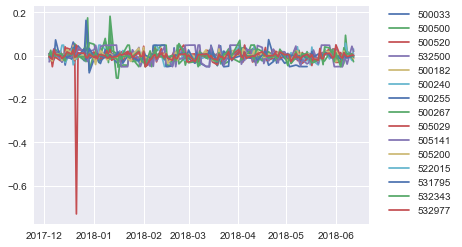

In [9]:
log_df = pd.DataFrame()
data = []
i = 0
for col in df.columns:
    temp = df[col]
    log_ = np.log(temp) - np.log(temp.shift(1))
    plt.plot(temp.index, log_, label=col)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    log_df[col] = log_
    data.append(go.Scatter(x=df[col].index, y=log_, name = l[i]))
    i+=1
plt.show()
py.iplot(data, filename = 'Logarithmic Timeseries')

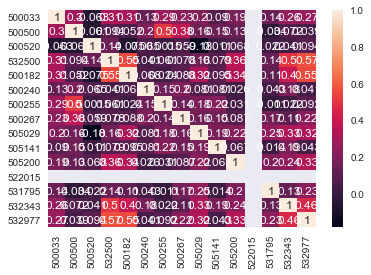

In [10]:
sns.set()
sns.heatmap(log_df.corr(min_periods=12), annot=True)
plt.show()

trace = go.Heatmap(z = log_df.corr(min_periods = 12).values.tolist(), colorscale = 'Viridis', x = l, y = l)
data=[trace]
py.iplot(data, filename='Logarithmic correlation-matrix')

In [11]:
stock_list2 = ["SENSEX","BOM532500","SI1900","SI1400"]
stock_dict2 = {}
for coin in stock_list2:
    stock_dict2[coin] = quandl.get("BSE/"+str(coin), start_date="2016-12-01")
    print(len(stock_dict2[coin]),coin)
frame2 = [ stock_dict2[name]['Close'] for name in stock_list2 ]
#for name, item in stock_dict2.items():
#    frame.append(item)
df2 = pd.concat(frame2, axis=1, keys=stock_list2)
df2 = df2.fillna(0)
print(df2.head())

380 SENSEX
381 BOM532500
380 SI1900
380 SI1400
              SENSEX  BOM532500    SI1900    SI1400
Date                                               
2016-12-01  26559.92    5249.25  19967.10  11881.25
2016-12-02  26230.66    5068.45  19645.38  11727.14
2016-12-05  26349.10    5204.30  20022.28  11705.88
2016-12-06  26392.76    5141.70  19946.31  11843.41
2016-12-07  26236.87    5118.20  20030.92  11950.50


In [12]:
df.dropna(inplace=True)
print(len(df))

131


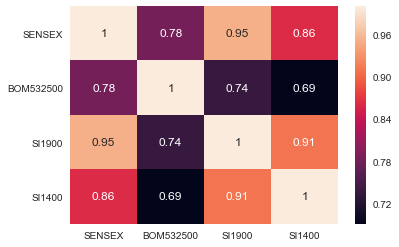

[[1.         0.78353571 0.95251374 0.86227563]
 [0.78353571 1.         0.73619287 0.69098031]
 [0.95251374 0.73619287 1.         0.91033617]
 [0.86227563 0.69098031 0.91033617 1.        ]]
BSE SENSEX
Maruti Suzuki India Ltd. EOD Prices
BSE AUTO
BSE OIL and GAS
['BSE SENSEX', 'Maruti Suzuki India Ltd. EOD Prices', 'BSE AUTO', 'BSE OIL and GAS']


In [13]:
sns.set()
sns.heatmap(df2.corr(min_periods=12), annot=True)
plt.show()
print(df2.corr(min_periods=12).values)
l = []
for k in df2.columns:
    p = names.loc["BSE/"+str(k)]
    print(p[0])
    l.append(p[0])
print(l)
trace = go.Heatmap(z = df2.corr(min_periods = 12).values.tolist(), colorscale = 'Viridis', x = l, y= l)
data=[trace]
py.iplot(data, filename='correlation-matrix-new')

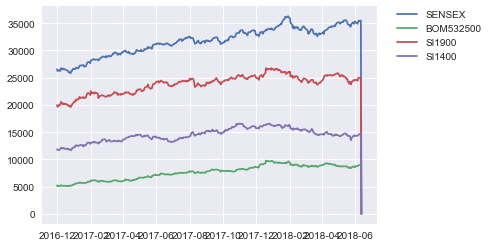

['BSE SENSEX', 'Maruti Suzuki India Ltd. EOD Prices', 'BSE AUTO', 'BSE OIL and GAS']


In [14]:
for col in df2.columns:
    plt.plot(df2[col].index, df2[col], label=col)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
plt.gcf().clear()
data = []
i = 0
print(l)
for col in df2.columns:
    data.append(go.Scatter(x=df2[col].index, y=df2[col], name = l[i]))
    i+=1
py.iplot(data, filename = 'Standard Timeseries new')

C:\Users\Ritabrata Maiti\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning:

divide by zero encountered in log



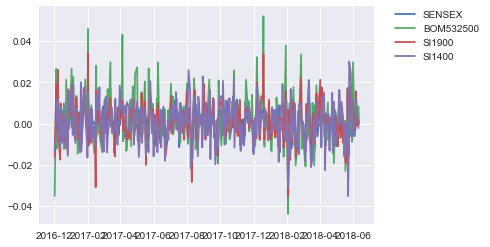

In [15]:
log_df2 = pd.DataFrame()
data = []
i = 0
for col in df2.columns:
    temp = df2[col]
    log_ = np.log(temp) - np.log(temp.shift(1))
    plt.plot(temp.index, log_, label=col)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    log_df2[col] = log_
    data.append(go.Scatter(x=df2[col].index, y=log_, name = l[i]))
    i+=1
plt.show()
py.iplot(data, filename = 'Logarithmic Timeseries 2')

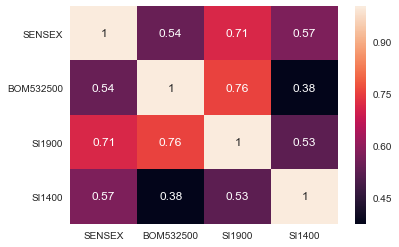

In [16]:
sns.set()
sns.heatmap(log_df2.corr(min_periods=12), annot=True)
plt.show()

trace = go.Heatmap(z = log_df2.corr(min_periods = 12).values.tolist(), colorscale = 'Viridis', x = l, y = l)
data=[trace]
py.iplot(data, filename='Logarithmic correlation-matrix 2')

In [98]:
df = quandl.get("BSE/BOM532500")

In [99]:
df = df[['Close']]

print(df)

              Close
Date               
2003-07-09   164.05
2003-07-10   166.95
2003-07-11   173.40
2003-07-14   178.20
2003-07-15   176.35
2003-07-16   176.95
2003-07-17   171.40
2003-07-18   167.45
2003-07-21   164.20
2003-07-22   167.80
2003-07-23   174.75
2003-07-24   174.05
2003-07-25   173.65
2003-07-28   179.35
2003-07-29   180.20
2003-07-30   180.90
2003-07-31   180.65
2003-08-01   187.80
2003-08-04   197.95
2003-08-05   193.90
2003-08-06   191.75
2003-08-07   195.30
2003-08-08   197.05
2003-08-11   202.65
2003-08-12   210.85
2003-08-13   218.05
2003-08-14   216.95
2003-08-18   217.15
2003-08-19   215.85
2003-08-20   225.55
...             ...
2018-05-02  8752.90
2018-05-03  8756.15
2018-05-04  8679.05
2018-05-07  8742.40
2018-05-08  8775.15
2018-05-09  8713.60
2018-05-10  8707.60
2018-05-11  8738.30
2018-05-14  8715.15
2018-05-15  8725.90
2018-05-16  8698.05
2018-05-17  8709.80
2018-05-18  8512.55
2018-05-21  8428.15
2018-05-22  8559.40
2018-05-23  8500.90
2018-05-24  8409.80


In [100]:
X = df.index.values
X = np.asarray(X)
from datetime import datetime
ar = []
days = X
for x in X:
    ar.append(x.astype(datetime))
X = ar
Y = df.values
Y.reshape(3715,)
ar = []
for y in Y:
    ar.append(y[0])
Y = ar        
print(Y)

[164.05, 166.95, 173.4, 178.2, 176.35, 176.95, 171.4, 167.45, 164.2, 167.8, 174.75, 174.05, 173.65, 179.35, 180.2, 180.9, 180.65, 187.8, 197.95, 193.9, 191.75, 195.3, 197.05, 202.65, 210.85, 218.05, 216.95, 217.15, 215.85, 225.55, 228.0, 229.5, 220.5, 233.85, 233.85, 227.95, 235.45, 235.8, 226.5, 222.5, 222.15, 229.65, 228.75, 228.8, 227.85, 225.3, 220.3, 208.15, 207.95, 215.75, 205.25, 206.95, 210.75, 213.5, 219.3, 214.2, 214.6, 228.2, 232.55, 228.1, 234.35, 241.2, 237.25, 240.5, 258.55, 270.0, 276.15, 264.1, 270.55, 274.85, 281.7, 274.85, 261.5, 264.5, 263.85, 287.65, 293.85, 283.0, 287.4, 306.3, 305.5, 323.2, 348.3, 347.95, 337.4, 338.05, 332.4, 342.75, 341.0, 342.9, 344.7, 328.45, 338.5, 351.1, 344.2, 330.2, 322.55, 324.85, 327.5, 337.7, 340.15, 344.85, 356.3, 354.3, 357.35, 362.65, 354.55, 357.1, 368.55, 368.15, 363.85, 363.05, 360.3, 357.15, 356.8, 363.5, 358.6, 357.65, 359.25, 354.75, 369.85, 383.25, 370.0, 376.3, 374.9, 380.75, 380.1, 369.0, 383.5, 399.9, 439.95, 418.9, 422.65,

In [101]:
import numpy as np
df = pd.DataFrame([X,Y])
df = df.transpose()
print(df)

                 0        1
0     1.057709e+18   164.05
1     1.057795e+18   166.95
2     1.057882e+18   173.40
3     1.058141e+18   178.20
4     1.058227e+18   176.35
5     1.058314e+18   176.95
6     1.058400e+18   171.40
7     1.058486e+18   167.45
8     1.058746e+18   164.20
9     1.058832e+18   167.80
10    1.058918e+18   174.75
11    1.059005e+18   174.05
12    1.059091e+18   173.65
13    1.059350e+18   179.35
14    1.059437e+18   180.20
15    1.059523e+18   180.90
16    1.059610e+18   180.65
17    1.059696e+18   187.80
18    1.059955e+18   197.95
19    1.060042e+18   193.90
20    1.060128e+18   191.75
21    1.060214e+18   195.30
22    1.060301e+18   197.05
23    1.060560e+18   202.65
24    1.060646e+18   210.85
25    1.060733e+18   218.05
26    1.060819e+18   216.95
27    1.061165e+18   217.15
28    1.061251e+18   215.85
29    1.061338e+18   225.55
...            ...      ...
3685  1.525219e+18  8752.90
3686  1.525306e+18  8756.15
3687  1.525392e+18  8679.05
3688  1.525651e+18  

In [102]:
import RapidML

In [104]:
model = RapidML.rapid_regressor(df)


Using RapidML Regressor

Continuing without label encoding


Generation 1 - Current best internal CV score: -1903694.8401321582


Generation 2 - Current best internal CV score: -1903694.8401321582


Generation 3 - Current best internal CV score: -1903694.8401321582


Generation 4 - Current best internal CV score: -1903327.200620129


Generation 5 - Current best internal CV score: -1903327.200620129



Best pipeline: ExtraTreesRegressor(StandardScaler(input_matrix), bootstrap=False, max_features=0.7500000000000001, min_samples_leaf=1, min_samples_split=7, n_estimators=100)

Sample Output from input dataframe: 
1.0578816e+18,173.4


In [105]:
ar = []
for x in X:
    ar.append(model.predict(x))
data = [go.Scatter(x=days, y=Y, name = "Actual"), go.Scatter(x=days, y=ar, name = "Predicted")]
py.iplot(data, filename = 'prophet')